In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline


In [3]:
df=pd.read_csv("iris.csv")

In [4]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
df.columns=["sepl","sepw","petl","petw","class"]

In [6]:
df.head()

,sepl,sepw,petl,petw,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


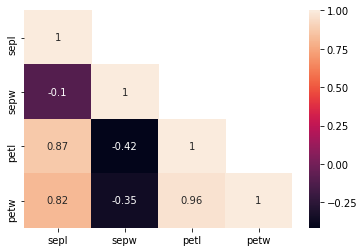

In [7]:
corr=df.corr()
mask=np.array(corr)
mask[np.tril_indices_from(mask)]=False
sn.heatmap(corr,mask=mask,annot=True)

In [8]:
x=df.iloc[:,:4]
y=df.iloc[:,[-1]]

In [9]:
df["sepl"]

0      4.9
1      4.7
2      4.6
3      5.0
4      5.4
5      4.6
6      5.0
7      4.4
8      4.9
9      5.4
10     4.8
11     4.8
12     4.3
13     5.8
14     5.7
15     5.4
16     5.1
17     5.7
18     5.1
19     5.4
20     5.1
21     4.6
22     5.1
23     4.8
24     5.0
25     5.0
26     5.2
27     5.2
28     4.7
29     4.8
      ... 
119    6.9
120    5.6
121    7.7
122    6.3
123    6.7
124    7.2
125    6.2
126    6.1
127    6.4
128    7.2
129    7.4
130    7.9
131    6.4
132    6.3
133    6.1
134    7.7
135    6.3
136    6.4
137    6.0
138    6.9
139    6.7
140    6.9
141    5.8
142    6.8
143    6.7
144    6.7
145    6.3
146    6.5
147    6.2
148    5.9
Name: sepl, Length: 149, dtype: float64

In [13]:
(df["sepl"][df["class"]=="Iris-setosa"]).mean()

5.004081632653061

In [11]:
x=df.drop('class',axis=1)
y=df["class"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [15]:
df["class"].isnull().sum()

0

In [16]:
df.isnull().sum()

sepl     0
sepw     0
petl     0
petw     0
class    0
dtype: int64

In [18]:
mod=DecisionTreeClassifier()

In [19]:
mod

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
mod.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
y_pred=mod.predict(x_test)

In [22]:
from sklearn import metrics

In [24]:
metrics.accuracy_score(y_test,y_pred)

0.9555555555555556

In [27]:
metrics.accuracy_score(y_train,mod.predict(x_train))

1.0

In [28]:
iris=pd.DataFrame({"class":y_pred})

In [29]:
iris.to_csv("iris_classification.csv",header=True,index=False)